__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

 1. Binary logistic regression requires the dependent variable to be binary.
    
 2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
 
 3. Only the meaningful variables should be included.

 4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

 5. The independent variables are linearly related to the log odds.

 6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from the The Spotify Hit Predictor Dataset (1960-2019) of Kaggle, and it is consisting of features for tracks fetched using Spotify's Web API. The dataset starting from Jan 1st, 1960, ending at Dec 31st, 1969. There might be some songs from the 50s, too. The classification goal is to predict whether the track will would be a 'Hit' (1) or not (0) (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset includes 8642 records and 19 fields.

In [2]:
data = pd.read_csv('dataset-of-60s.csv')
print(data.shape)
print(data.columns)

(8642, 19)
Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8642 entries, 0 to 8641
Data columns (total 19 columns):
track               8642 non-null object
artist              8642 non-null object
uri                 8642 non-null object
danceability        8642 non-null float64
energy              8642 non-null float64
key                 8642 non-null int64
loudness            8642 non-null float64
mode                8642 non-null int64
speechiness         8642 non-null float64
acousticness        8642 non-null float64
instrumentalness    8642 non-null float64
liveness            8642 non-null float64
valence             8642 non-null float64
tempo               8642 non-null float64
duration_ms         8642 non-null int64
time_signature      8642 non-null int64
chorus_hit          8642 non-null float64
sections            8642 non-null int64
target              8642 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.3+ MB


### Input variables

 1. track: The Name of the track — (categorial)
 2. artist: The Name of the first artist listed for the track — (categorial)
 3. uri: The resource identifier for the track — (categorial)
 4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements —(numeric).
 5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks — (numeric).
 6. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, — (numeric).
 7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful — (numeric).
 8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is — (numeric).
 9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book — (numeric).
 10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is — (numeric).
 11. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. — (numeric).
 12. liveness: Detects the presence of an audience in the recording — (numeric). 
 13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. — (numeric). 
 14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed — (numeric). 
 15. duration_ms: The duration of the track in milliseconds — (numeric). 
 16. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats —(numeric).
 17. chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third —(numeric).
 18. sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call — (numeric)
 

### Predict variable (desired target):

target — whether the track is a hit or not? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
data['track'].unique()
print(len(data['track'].unique()))

8081


In [6]:
print(data['artist'].unique())
print(len(data['artist'].unique()))

['Garland Green' 'Serge Gainsbourg' 'Lord Melody' ...
 'Billy Joe & The Checkmates' 'The Flying Machine' 'The Rationals']
1542


In [7]:
print(data['uri'].unique())
print(len(data['uri'].unique()))

['spotify:track:1dtKN6wwlolkM8XZy2y9C1'
 'spotify:track:5hjsmSnUefdUqzsDogisiX'
 'spotify:track:6uk8tI6pwxxdVTNlNOJeJh' ...
 'spotify:track:2uC02PCRVM6BhAaK7dgxxp'
 'spotify:track:0gpSUWZWNIRrEenaC1ZGk9'
 'spotify:track:5j0G0nkCSPlmSCSgXchMn3']
8625


# Data exploration

In [8]:
data['target'].value_counts()

1    4321
0    4321
Name: target, dtype: int64

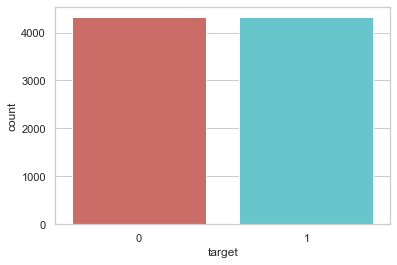

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='target', data=data, palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_hit = len(data[data['target']==0])
count_hit = len(data[data['target']==1])
pct_of_no_hit = count_no_hit/(count_no_hit+count_hit)
print("\033[1m percentage of no hit is", pct_of_no_hit*100)
pct_of_hit = count_hit/(count_no_hit+count_hit)
print("\033[1m percentage of hit", pct_of_hit*100)

 percentage of no hit is 50.0
 percentage of hit 50.0


Our classes are imbalanced, and the ratio of no-hit to hit instances is 50:50. Let’s do some more exploration.

In [11]:
data.groupby('target').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
target,,,,,,,,,,,,,,,
0,0.453756,0.379267,5.012960,-13.609830,0.672298,0.075488,0.694324,0.249595,0.207899,0.486502,111.507857,201594.851423,3.791946,39.186581,9.479750
1,0.530582,0.511152,5.140014,-10.449623,0.838926,0.049316,0.536790,0.050243,0.219162,0.663424,118.742690,165681.836843,3.841240,38.689844,8.288822


# Observations:
 1. The average danceability level of hits is higher than that of non-hits.
 2. The average energy level of hits is higher than that of non-hits.
 3. The average key level of hits is a bit lower than that of non-hits.
 4. The average loudness level of hits is lower than that of non-hits.
 5. The average mode level of hits is higher than that of non-hits.
 6. The average speechiness level of hits is a bit lower than that of non-hits.
 7. The average acousticness level of hits is a bit lower than that of non-hits.
 8. The average instrumentalness level of hits is lower than that of non-hits.
 9. The average liveness level of hits is a bit lower than that of non-hits.
 10. The average valence level of hits is higher than that of non-hits.
 11. The average tempo level of hits is higher than that of non-hits.
 12. The average duration_ms level of hits is lower than that of non-hits.
 13. The average time_signature level of hits is higher than that of non-hits.
 14. The average chorus_hit level of hits is a bit lower than that of non-hits.
 15. The average sections level of hits is a bit lower than that of non-hits.


# Visualizations

## 1. danceability

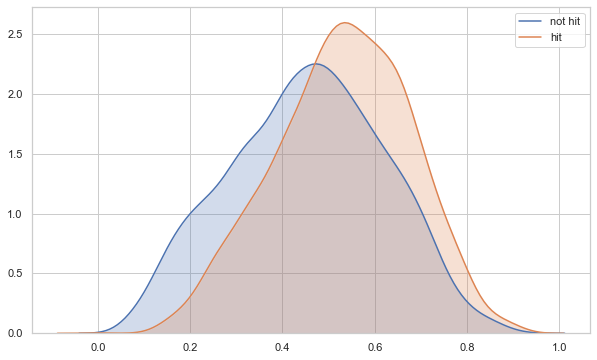

In [12]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data['danceability'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['danceability'].loc[data['target'] == 1], label='hit', shade=True);

In [13]:
data['danceability'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.453756
std         0.167505
min         0.059300
25%         0.331000
50%         0.460000
75%         0.576000
max         0.912000
Name: danceability, dtype: float64

In [14]:
data['danceability'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.530582
std         0.146969
min         0.000000
25%         0.430000
50%         0.537000
75%         0.638000
max         0.922000
Name: danceability, dtype: float64

## 2. energy

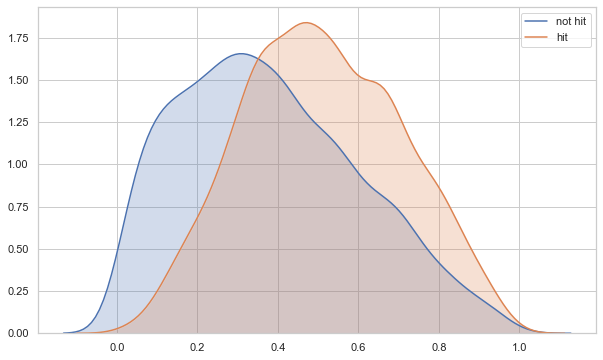

In [15]:
sns.kdeplot(data['energy'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['energy'].loc[data['target'] == 1], label='hit', shade=True);

In [16]:
data['energy'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.379267
std         0.222634
min         0.000576
25%         0.201000
50%         0.355000
75%         0.534000
max         0.995000
Name: energy, dtype: float64

In [17]:
data['energy'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.511152
std         0.196718
min         0.018100
25%         0.364000
50%         0.502000
75%         0.660000
max         0.995000
Name: energy, dtype: float64

## 3. key

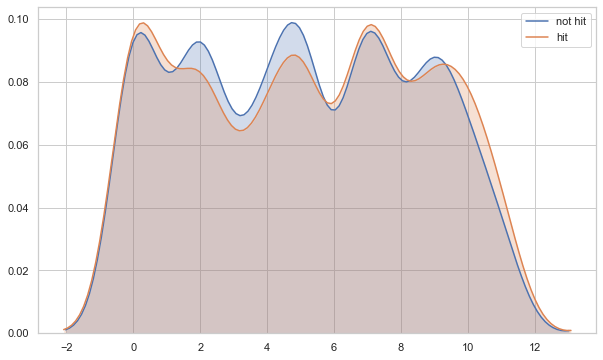

In [18]:
sns.kdeplot(data['key'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['key'].loc[data['target'] == 1], label='hit', shade=True);

In [19]:
data['key'].loc[data['target'] == 0].describe()

count    4321.000000
mean        5.012960
std         3.399185
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

In [20]:
data['key'].loc[data['target'] == 1].describe()

count    4321.000000
mean        5.140014
std         3.499481
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

## 4. loudness

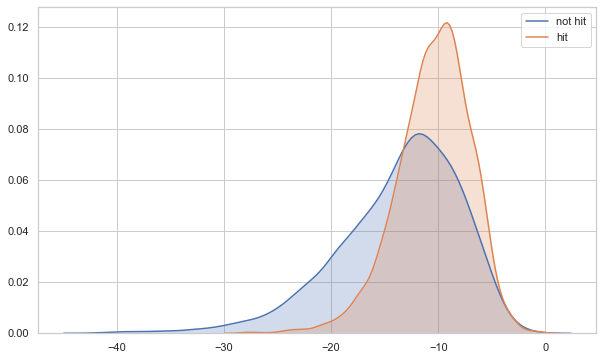

In [21]:
sns.kdeplot(data['loudness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['loudness'].loc[data['target'] == 1], label='hit', shade=True);

In [22]:
data['loudness'].loc[data['target'] == 0].describe()

count    4321.000000
mean      -13.609830
std         5.752442
min       -41.643000
25%       -16.922000
50%       -12.678000
75%        -9.421000
max        -0.934000
Name: loudness, dtype: float64

In [23]:
data['loudness'].loc[data['target'] == 1].describe()

count    4321.000000
mean      -10.449623
std         3.434263
min       -28.030000
25%       -12.489000
50%       -10.107000
75%        -8.092000
max        -0.507000
Name: loudness, dtype: float64

## 5. mode

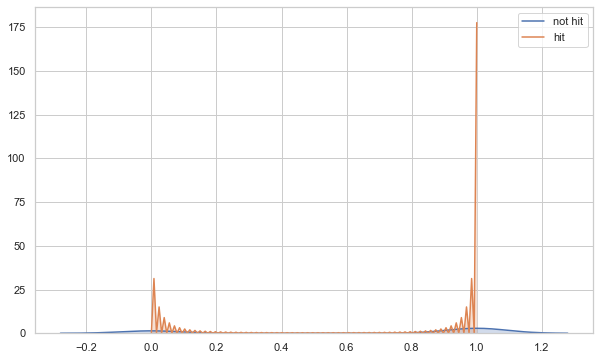

In [24]:
sns.kdeplot(data['mode'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['mode'].loc[data['target'] == 1], label='hit', shade=True);

In [25]:
data['mode'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.672298
std         0.469430
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

In [26]:
data['mode'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.838926
std         0.367642
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

## 6. speechiness

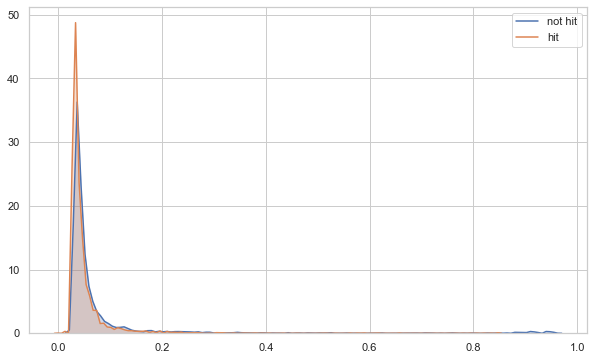

In [27]:
sns.kdeplot(data['speechiness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['speechiness'].loc[data['target'] == 1], label='hit', shade=True);

In [28]:
data['speechiness'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.075488
std         0.129234
min         0.024100
25%         0.034200
50%         0.041200
75%         0.058000
max         0.960000
Name: speechiness, dtype: float64

In [29]:
data['speechiness'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.049316
std         0.048173
min         0.000000
25%         0.030900
50%         0.036200
75%         0.048300
max         0.847000
Name: speechiness, dtype: float64

## 7. acousticness

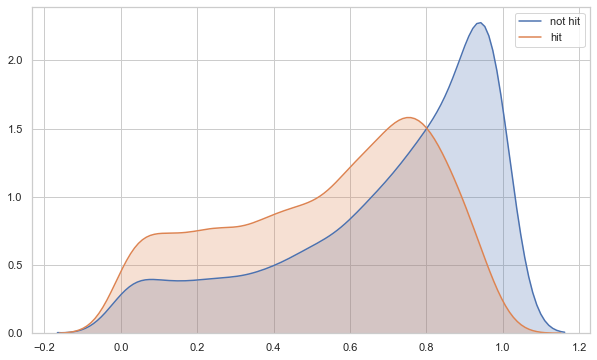

In [30]:
sns.kdeplot(data['acousticness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['acousticness'].loc[data['target'] == 1], label='hit', shade=True);

In [31]:
data['acousticness'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.694324
std         0.278936
min         0.000005
25%         0.531000
50%         0.781000
75%         0.927000
max         0.996000
Name: acousticness, dtype: float64

In [32]:
data['acousticness'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.536790
std         0.269889
min         0.000028
25%         0.321000
50%         0.590000
75%         0.763000
max         0.991000
Name: acousticness, dtype: float64

## 8. instrumentalness

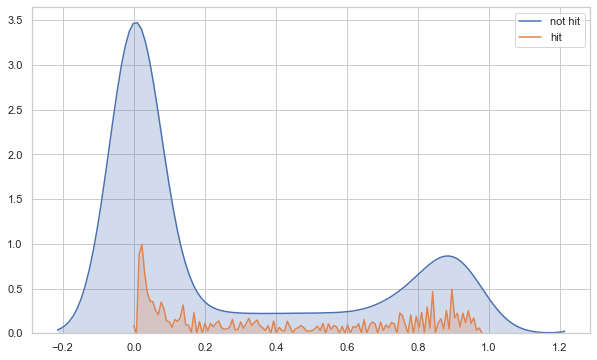

In [33]:
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 1], label='hit', shade=True);

In [34]:
data['instrumentalness'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.249595
std         0.360892
min         0.000000
25%         0.000002
50%         0.002670
75%         0.565000
max         0.999000
Name: instrumentalness, dtype: float64

In [35]:
data['instrumentalness'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.050243
std         0.179934
min         0.000000
25%         0.000000
50%         0.000003
75%         0.000341
max         0.981000
Name: instrumentalness, dtype: float64

## 9. liveness

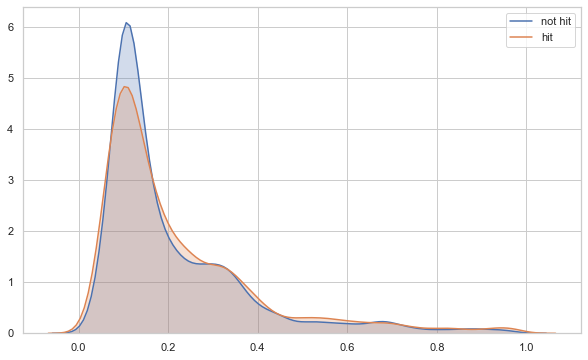

In [36]:
sns.kdeplot(data['liveness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['liveness'].loc[data['target'] == 1], label='hit', shade=True);

In [37]:
data['liveness'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.207899
std         0.163298
min         0.014600
25%         0.104000
50%         0.142000
75%         0.270000
max         0.971000
Name: liveness, dtype: float64

In [38]:
data['liveness'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.219162
std         0.175254
min         0.013600
25%         0.101000
50%         0.155000
75%         0.285000
max         0.984000
Name: liveness, dtype: float64

## 10. valence

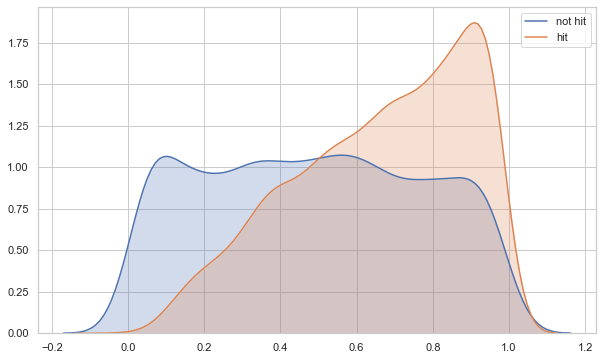

In [39]:
sns.kdeplot(data['valence'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['valence'].loc[data['target'] == 1], label='hit', shade=True);

In [40]:
data['valence'].loc[data['target'] == 0].describe()

count    4321.000000
mean        0.486502
std         0.284845
min         0.000000
25%         0.239000
50%         0.484000
75%         0.728000
max         0.993000
Name: valence, dtype: float64

In [41]:
data['valence'].loc[data['target'] == 1].describe()

count    4321.000000
mean        0.663424
std         0.228923
min         0.000000
25%         0.496000
50%         0.699000
75%         0.862000
max         0.991000
Name: valence, dtype: float64

## 11. tempo

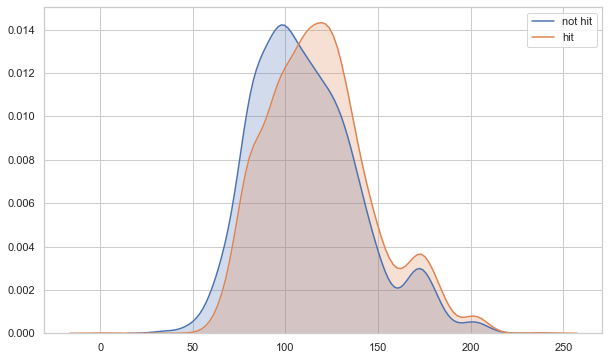

In [42]:
sns.kdeplot(data['tempo'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['tempo'].loc[data['target'] == 1], label='hit', shade=True);

In [43]:
data['tempo'].loc[data['target'] == 0].describe()

count    4321.000000
mean      111.507857
std        29.034609
min        31.988000
25%        90.154000
50%       107.930000
75%       129.043000
max       212.900000
Name: tempo, dtype: float64

In [44]:
data['tempo'].loc[data['target'] == 1].describe()

count    4321.000000
mean      118.742690
std        28.940672
min         0.000000
25%        97.497000
50%       116.389000
75%       134.670000
max       241.009000
Name: tempo, dtype: float64

## 12. duration_ms

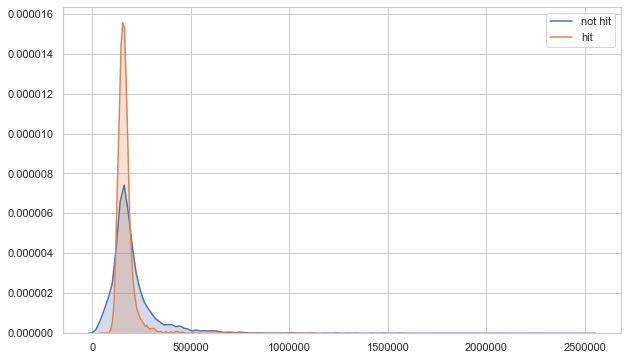

In [45]:
sns.kdeplot(data['duration_ms'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['duration_ms'].loc[data['target'] == 1], label='hit', shade=True);

In [46]:
data['duration_ms'].loc[data['target'] == 0].describe()

count    4.321000e+03
mean     2.015949e+05
std      1.331826e+05
min      1.516800e+04
25%      1.381330e+05
50%      1.706670e+05
75%      2.216880e+05
max      2.516987e+06
Name: duration_ms, dtype: float64

In [47]:
data['duration_ms'].loc[data['target'] == 1].describe()

count    4.321000e+03
mean     1.656818e+05
std      4.301323e+04
min      4.689300e+04
25%      1.427590e+05
50%      1.590400e+05
75%      1.771330e+05
max      1.124153e+06
Name: duration_ms, dtype: float64

## 13. time_signature

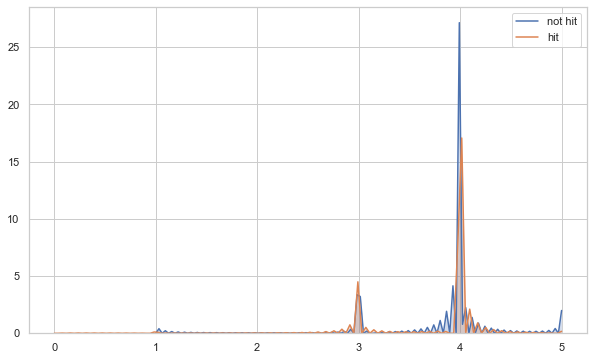

In [48]:
sns.kdeplot(data['time_signature'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['time_signature'].loc[data['target'] == 1], label='hit', shade=True);

In [49]:
data['time_signature'].loc[data['target'] == 0].describe()

count    4321.000000
mean        3.791946
std         0.605522
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

In [50]:
data['time_signature'].loc[data['target'] == 1].describe()

count    4321.00000
mean        3.84124
std         0.43277
min         0.00000
25%         4.00000
50%         4.00000
75%         4.00000
max         5.00000
Name: time_signature, dtype: float64

## 14. chorus_hit

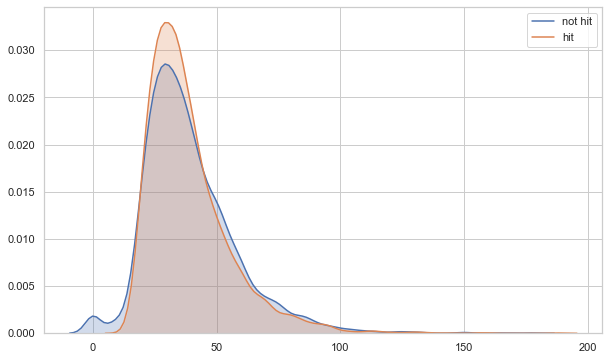

In [51]:
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 1], label='hit', shade=True);

In [52]:
data['chorus_hit'].loc[data['target'] == 0].describe()

count    4321.000000
mean       39.186581
std        18.394284
min         0.000000
25%        26.875600
50%        35.674360
75%        48.233190
max       177.045930
Name: chorus_hit, dtype: float64

In [53]:
data['chorus_hit'].loc[data['target'] == 1].describe()

count    4321.000000
mean       38.689844
std        16.547566
min        13.117140
25%        27.323030
50%        34.762470
75%        45.729820
max       187.495630
Name: chorus_hit, dtype: float64

## 15. sections

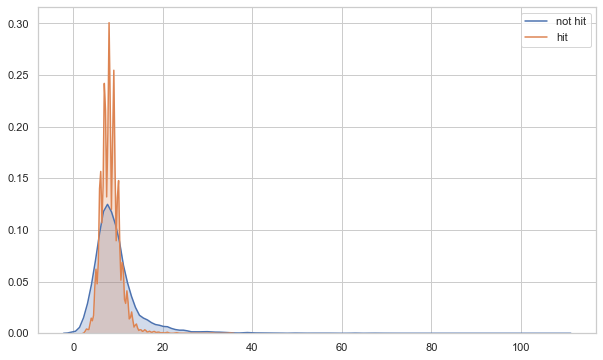

In [54]:
sns.kdeplot(data['sections'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['sections'].loc[data['target'] == 1], label='hit', shade=True);

In [55]:
data['sections'].loc[data['target'] == 0].describe()

count    4321.000000
mean        9.479750
std         5.663612
min         0.000000
25%         6.000000
50%         8.000000
75%        11.000000
max       109.000000
Name: sections, dtype: float64

In [56]:
data['sections'].loc[data['target'] == 1].describe()

count    4321.000000
mean        8.288822
std         2.168565
min         3.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        35.000000
Name: sections, dtype: float64

Our final data columns will be:

In [57]:
data_final=data.copy()
data_final.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'target'], dtype=object)

In [58]:
data_final.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [59]:
data_final.columns.values

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections',
       'target'], dtype=object)

In [60]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
y=y.astype('int')

# Implementing the model

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.539519
         Iterations 7
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.222    
Dependent Variable:  target           AIC:              9355.0447
Date:                2020-06-03 00:12 BIC:              9461.0105
No. Observations:    8642             Log-Likelihood:   -4662.5  
Df Model:            14               LL-Null:          -5990.2  
Df Residuals:        8627             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      7.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
danceability      1.5260   0.2192   6.9633 0.0000  1.0965  1.9555
energy            1.0928   0.2102   5.1992 0.0000  0.6809  1.5048


# Logistic Regression Model Fitting

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[670 590]
 [525 808]]


In [65]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1478 correct predictions.
 The result is telling us that we have:  1115 incorrect predictions.
 We have a total predictions of:  2593


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1260
           1       0.58      0.61      0.59      1333

    accuracy                           0.57      2593
   macro avg       0.57      0.57      0.57      2593
weighted avg       0.57      0.57      0.57      2593



In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Logistic Regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Logistic Regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic\nRegression model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Logistic Regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Logistic Regression model: 57.00%
Well, you got a classification rate of 57.00%

Precision of Logistic Regression model: 57.80%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic
Regression model predicted a track is a hit, that track was actually a hit 57.80% of
 the time.

Recall of Logistic Regression model: 60.62%
Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model
can identify it 60.62% of the time.


### ROC Curve

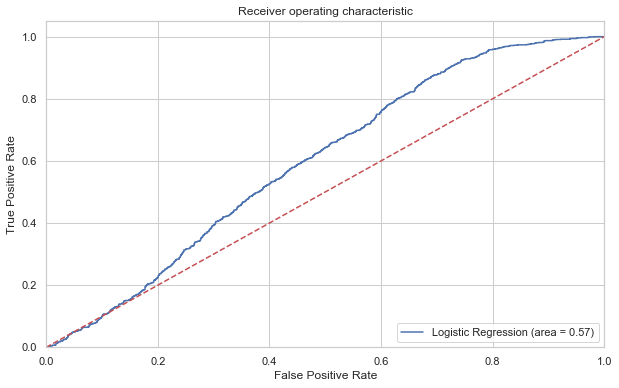

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Random forest Classifier Model Fitting

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [70]:
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.76


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 885  375]
 [ 258 1075]]


In [72]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1960 correct predictions.
 The result is telling us that we have:  633 incorrect predictions.
 We have a total predictions of:  2593


### Compute precision, recall, F-measure and support

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1260
           1       0.74      0.81      0.77      1333

    accuracy                           0.76      2593
   macro avg       0.76      0.75      0.75      2593
weighted avg       0.76      0.76      0.76      2593



In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Random Forest model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random\nForest model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Random Forest model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Random Forest model: 75.59%
Well, you got a classification rate of 75.59%

Precision of Random Forest model: 74.14%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random
Forest model predicted a track is a hit, that track was actually a hit 74.14% of
 the time.

Recall of Random Forest model: 80.65%
Recall: If there is a track which is a hit the present in the test set, our Random Forest model
can identify it 80.65% of the time.


### ROC Curve

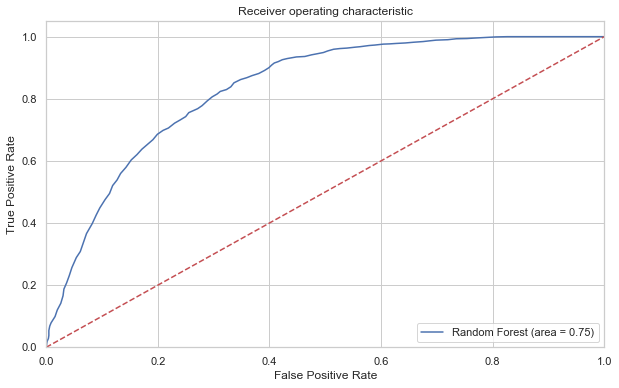

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Gradient boosting Classifier Model Fitting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [77]:
y_pred = gb.predict(X_test)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of gradient boosting classifier on test set: 0.76


### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 872  388]
 [ 223 1110]]


In [79]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1982 correct predictions.
 The result is telling us that we have:  611 incorrect predictions.
 We have a total predictions of:  2593


### Compute precision, recall, F-measure and support

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1260
           1       0.74      0.83      0.78      1333

    accuracy                           0.76      2593
   macro avg       0.77      0.76      0.76      2593
weighted avg       0.77      0.76      0.76      2593



In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Gradient Boosting model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient\nBoosting model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Gradient Boosting model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Gradient Boosting model: 76.44%
Well, you got a classification rate of 76.44%

Precision of Gradient Boosting model: 74.10%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient
Boosting model predicted a track is a hit, that track was actually a hit 74.10% of
 the time.

Recall of Gradient Boosting model: 83.27%
Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model
can identify it 83.27% of the time.


### ROC Curve

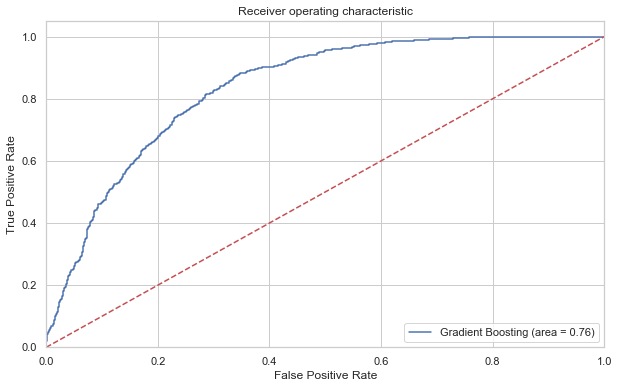

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

I would consider the gradient boosting as our final model

# Real time predictions

Finally, the best way to use this model is assigning hit Probability for each track, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [83]:
data['Prob_to_Hit'] = gb.predict_proba(data[X_train.columns])[:,1]

Our dataset looks like below at the end:

In [84]:
data[['track','artist','Prob_to_Hit']].head(10)

,track,artist,Prob_to_Hit
0,Jealous Kind Of Fella,Garland Green,0.855708
1,Initials B.B.,Serge Gainsbourg,0.380566
2,Melody Twist,Lord Melody,0.347899
3,Mi Bomba Sonó,Celia Cruz,0.220451
4,Uravu Solla,P. Susheela,0.072459
5,Beat n. 3,Ennio Morricone,0.697151
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,0.568865
7,Happy Days,Marv Johnson,0.795396
8,Carolina - Remastered 2006,Caetano Veloso,0.103175
9,I Can Hear Music,The Beach Boys,0.877036


In [85]:
data.to_csv('Prob_to_Hit_60s.csv', index=False, encoding='utf-8')

# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning classification project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.